---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 1

---

Please write your full name here
- **Name** : "Nouran Mahmoud Mahmoud Mohammed Khatab"

- **Make sure to answer ALL questions**
- **Leave the output of the cells, don't remove it**

## Introduction to Machine Learning
For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [3]:
len(cancer.feature_names)

30

In [4]:
def answer_zero():
    # write your answer code here to question 0
    n = len(cancer.feature_names)
    # print(n)
    return n # Return your answer

In [5]:
print(answer_zero)

<function answer_zero at 0x7d2351ade680>


### Question 1
Pandas dataframes are much easier and more interpretable when dealing with tables. **Convert the cancer data into dataframe.**

Note: Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training any model.

*This function should return a (569, 31) DataFrame with *

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
    
*and index = *

RangeIndex(start=0, stop=569, step=1)

In [6]:
import pandas as pd
def answer_one():

    # Your code here
    cancer_df = pd.DataFrame(data = cancer.data,columns= cancer.feature_names)
    cancer_df['target'] = cancer.target
    cancer_df['index'] = np.arange(0,len(cancer.data),1)
    cancer_df.insert(0,'index', cancer_df.pop('index'))

    return cancer_df # Return your answer


print(answer_one())

     index  mean radius  mean texture  mean perimeter  mean area  \
0        0        17.99         10.38          122.80     1001.0   
1        1        20.57         17.77          132.90     1326.0   
2        2        19.69         21.25          130.00     1203.0   
3        3        11.42         20.38           77.58      386.1   
4        4        20.29         14.34          135.10     1297.0   
..     ...          ...           ...             ...        ...   
564    564        21.56         22.39          142.00     1479.0   
565    565        20.13         28.25          131.20     1261.0   
566    566        16.60         28.08          108.30      858.1   
567    567        20.60         29.33          140.10     1265.0   
568    568         7.76         24.54           47.92      181.0   

     mean smoothness  mean compactness  mean concavity  mean concave points  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474     

### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

In [7]:
def answer_two():
    cancerdf = answer_one()
    # malignant then benign
    class_distribution = (len(np.where(cancerdf['target']==0)[0]), len(np.where(cancerdf['target']==1)[0]))


    # Your code here

    return class_distribution # Return your answer


print(answer_two())

(212, 357)


### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

In [8]:
# cancerdf = answer_one()
# cols = cancerdf.columns
# print(cols)
# print(cols[1:-1])

In [9]:
def answer_three():
    cancerdf = answer_one()
    X = cancerdf[cancerdf.columns[1:-1]]
    y = cancerdf[cancerdf.columns[-1]]
    # Your code here

    return X, y

In [10]:
# answer_three()

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets. Use only 20% of the data for testing. Use a random state of 40

In [11]:
# from sklearn.model_selection import train_test_split
# help(train_test_split)

In [12]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()

    # Your code here
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    return X_train, X_test, y_train, y_test

In [13]:
X_train, X_test, y_train, y_test = answer_four()
print(len(X_train))

455


### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train`.

In [14]:
# from sklearn.neighbors import KNeighborsClassifier
# help(KNeighborsClassifier)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()

    # Your code here
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    return knn # Return your model

In [16]:
print(answer_five())

KNeighborsClassifier(n_neighbors=3)


### Question 6
- Create an example that consists of the mean values for each feature in the X_train data.
- Using your knn classifier, predict the class label for this example.

In [17]:

# mean_row = pd.DataFrame(X_train.mean()).T
# print(mean_row.shape)

In [38]:
def answer_six():
    # Your code here
    mean_row = pd.DataFrame(X_train.mean()).transpose()
    knn = answer_five()
    one_label = knn.predict(mean_row)
    return one_label # Return your answer --> label prediction

In [39]:
print(answer_six())

[1]


### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`. Return the predicted labels

In [20]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    # Your code here
    y_hat = knn.predict(X_test)

    return y_hat# Return your answer

In [21]:
print(answer_seven())

[0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 1 1 0]


### Question 8
Find the score (accuracy) of your knn classifier using `X_test` and `y_test` & `X_train` and `y_train`.
- Is the training accuracy higher or lower that the testing accuracy?
- According to the test accuracy, would this model generalize well to new unseen inputs?

In [31]:
# X_train, X_test, y_train, y_test = answer_four()
# fitted_knn = answer_five()
# # Your code here
# y_hat = fitted_knn.predict(X_test)
# print(len(np.where(y_hat==y_test)[0]))
# print(len(y_test))
# print("{:.2f}".format(float(len(np.where(y_hat==y_test)[0])/len(y_test))))

106
114
0.93


In [40]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    fitted_knn = answer_five()
    # Your code here
    y_hat_train = fitted_knn.predict(X_train)
    y_hat_test = fitted_knn.predict(X_test)
    def calc_acc(y_hat,y_true):
      return "{:.2f}".format(float(len(np.where(y_hat==y_true)[0])/len(y_true)))

    return (calc_acc(y_hat_test, y_test), calc_acc(y_hat_train,y_train )) # Return your answer --> (test_score, train_score)

In [41]:
print(answer_eight())

('0.93', '0.95')


**Answer**

1.Training accuracy is higher than test accuracy

2.Test accuracy isn't that high (the loss isn't too low), so it has the potential to generalize

### Question 9
##### Accuracy Plot
* Create `mal_train_X`, `mal_train_y`,`ben_train_X`,`ben_train_y`, `mal_test_X`,`mal_test_y`, `ben_test_X` and `ben_test_y` portions of the dataset. Where `mal_train_X` contains all training samples that belongs to malignant class while `mal_train_y` contains all labels of the samples that belongs to malignant class, and so on for other variables.

* Calculate Accuracy scores for each case and save all the results in a list called `scores` using knn model from question 5.

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [54]:
#  X_train, X_test, y_train, y_test = answer_four() # dataframes
#  print(cancer.target_names) # mal-> 0, ben -> 1
#  print(np.where(y_train==1)[0]) # ben indxs in train representing the rows in X_train
#  ben_train_X = X_train.iloc[np.where(y_train==1)[0], :]
#  print(ben_train_X.head)

In [63]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib notebook

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)

    # #################################################################################
    # ###################### Write your code here #####################################
    # #################################################################################

    mal_train_X = X_train.iloc[np.where(y_train == 0)[0], :]
    mal_train_y = y_train.iloc[np.where(y_train == 0)[0]]
    ben_train_X = X_train.iloc[np.where(y_train == 1)[0], :]
    ben_train_y = y_train.iloc[np.where(y_train == 1)[0]]

    mal_test_X = X_test.iloc[np.where(y_test == 0)[0], :]
    mal_test_y = y_test.iloc[np.where(y_test == 0)[0]]
    ben_test_X = X_test.iloc[np.where(y_test == 1)[0], :]
    ben_test_y = y_test.iloc[np.where(y_test == 1)[0]]

    knn = answer_five()
    def acc(X,y_true):
      y_hat = knn.predict(X)
      return "{:.2f}".format(float(len(np.where(y_hat==y_true)[0])/len(y_true)))


    scores = [acc(mal_train_X,mal_train_y), acc(ben_train_X,ben_train_y), acc(mal_test_X,mal_test_y), acc(ben_test_X,ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2),
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

In [65]:
accuracy_plot()

<IPython.core.display.Javascript object>

### Question 10
1. Load Iris dataset from sklearn.
2. Split the data into training and testing (30% testing), use random_state 100
3. Create scatter plot matrix using the Seaborn library.
4. Choose two features only to train a knn model with suitable "k".
    - You must choose the best two features --> i.e. you need to experiment!!
    - You must choose the best K --> i.e. you need to experiment!!
5. Evaluate your model performance and comment on your results.
    - Print testing and training accuracies
    - Plot a confusion matrix for the model on the test data
    - **Questions to answer**:
        - Do you think the model did well?
        - Suggest one way to improve the model results

In [ ]:
########### CODE

In [95]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X,y,stratify=y, random_state=100)

In [96]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(X ) # petal length and petal width are dependent, so they are not good features, one of them is enough

<IPython.core.display.Javascript object>

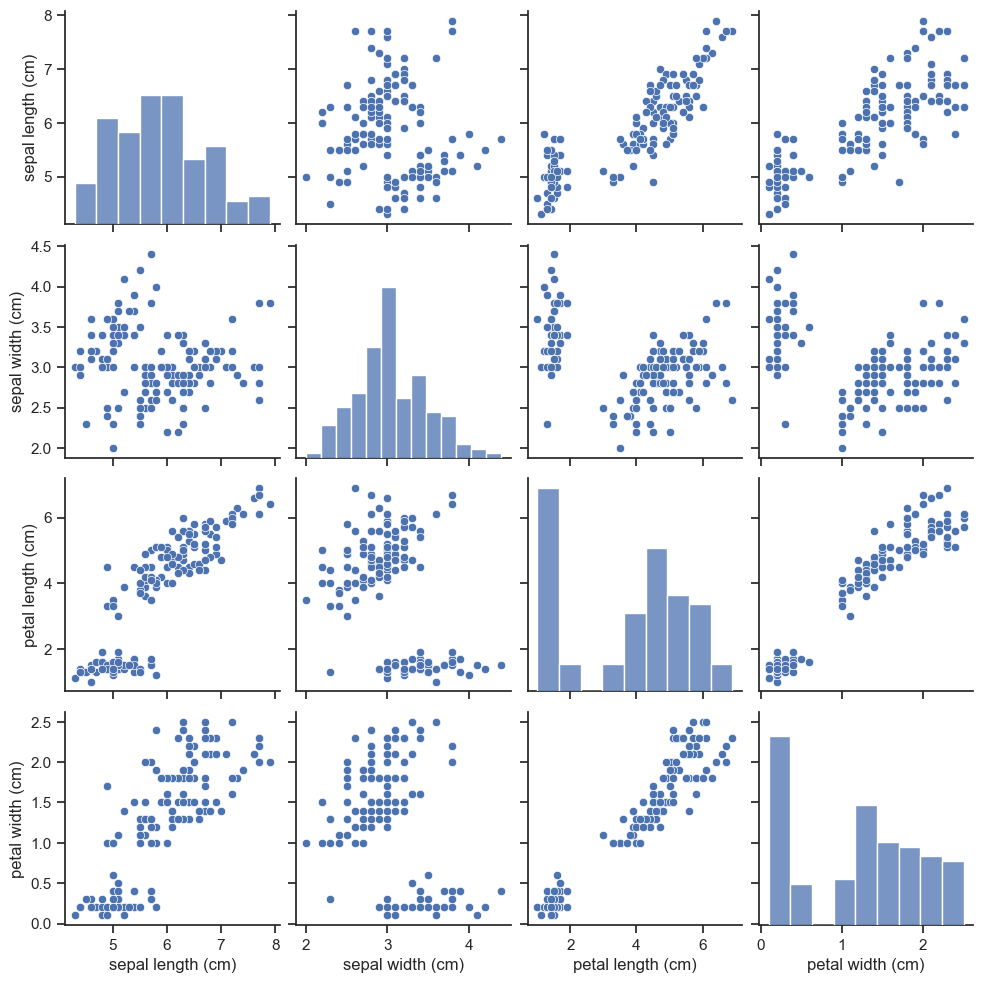

In [106]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


from matplotlib import pyplot as plt
_df_0['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sepal width (cm)'].plot(kind='hist', bins=20, title='sepal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['petal length (cm)'].plot(kind='hist', bins=20, title='petal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['petal width (cm)'].plot(kind='hist', bins=20, title='petal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

<IPython.core.display.Javascript object>

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<IPython.core.display.Javascript object>

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<IPython.core.display.Javascript object>

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['sepal length (cm)'].plot(kind='line', figsize=(8, 4), title='sepal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['sepal width (cm)'].plot(kind='line', figsize=(8, 4), title='sepal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['petal length (cm)'].plot(kind='line', figsize=(8, 4), title='petal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['petal width (cm)'].plot(kind='line', figsize=(8, 4), title='petal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [107]:
X = iris.data[["sepal length (cm)", "sepal width (cm)","petal length (cm)"]]
y = iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X,y,stratify=y, random_state=100)

In [108]:
# expirementing with k
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_iris, y_train_iris)
range_k = range(1,20)
scores = []
def acc(X,y_true):
      y_hat = knn.predict(X)
      return float(len(np.where(y_hat==y_true)[0])/len(y_true))
# print(acc(X_test_iris, y_test_iris)) # 0.9473684210526315
# print(knn.score(X_test_iris, y_test_iris)) # 0.9473684210526315
for k in range_k:
  knn_2 = KNeighborsClassifier(n_neighbors=k)
  knn_2.fit(X_train_iris, y_train_iris)
  scores.append(knn.score(X_test_iris, y_test_iris))
plt.figure()
plt.xlabel('x')
plt.ylabel('accuracy')
plt.scatter(range_k,scores)
plt.xticks([0,5,10,15,20])
# no expirement with k

<IPython.core.display.Javascript object>

([<matplotlib.axis.XTick at 0x7d234283a200>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

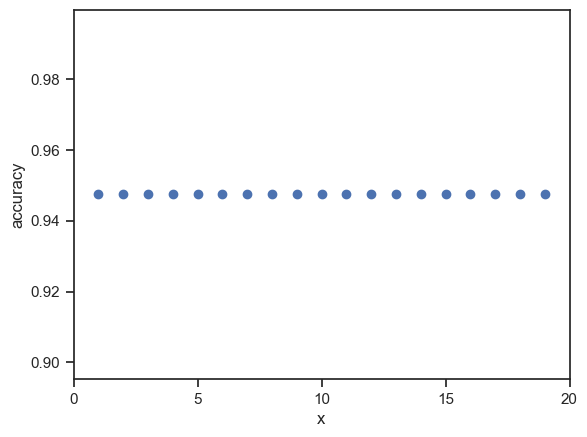

In [109]:
print(f"testing accuracy {acc(X_test_iris, y_test_iris)}, and training accuracy is {acc(X_train_iris, y_train_iris)}")

testing accuracy 0.9473684210526315, and training accuracy is 0.9642857142857143


In [116]:
from sklearn import metrics
import matplotlib.pyplot as plt


confusion_matrix = metrics.confusion_matrix(y_test_iris, knn.predict(X_test_iris))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels  = iris.target_names)
cm_display.plot()
plt.show()


<IPython.core.display.Javascript object>

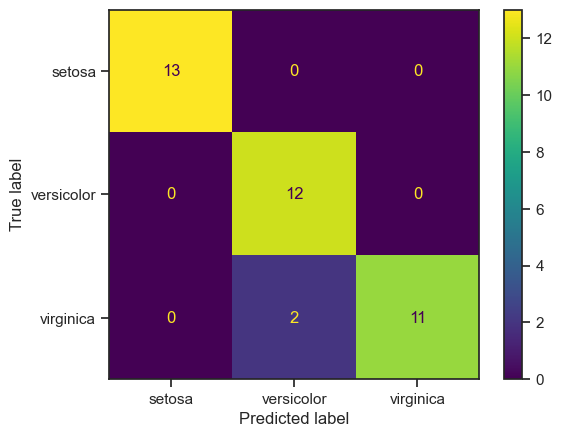

**Answer**

1. I think that the model did very well, although I don't know why the accuracy didn't change over diiferent values of neighbours.

2. one possible way to enhance it is normalizing the data